# Building the graphics of our experimental findings

This notebook aims to build the graphics that will be presented in the research report. It uses the data obtained from other notebooks and extract their main insights.

C:\Users\yanis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


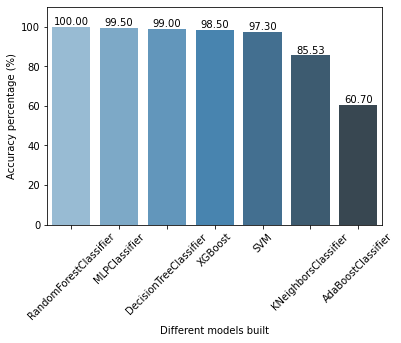

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 1
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

results = { "RandomForestClassifier":100,
            "MLPClassifier":99.5,
            "DecisionTreeClassifier": 99,
            "XGBoost": 98.5,  
            "SVM":97.3,
            "KNeighborsClassifier":85.53,  
            "AdaBoostClassifier": 60.7,
            }

ax = sns.barplot(list(results.keys()), list(results.values()), palette="Blues_d")
plt.ylim(0,110)
ax.tick_params(axis='x', labelsize=10)
for item in ax.get_xticklabels():
    item.set_rotation(45)
ax.set(xlabel='Different models built', ylabel='Accuracy percentage (%)')
show_values_on_bars(ax)

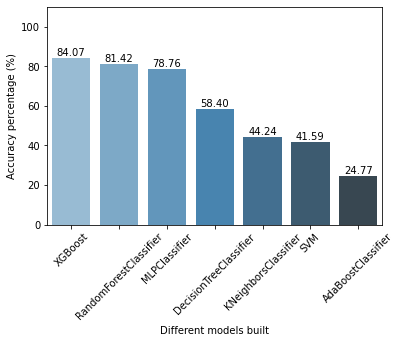

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 1
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

results_livescore = { "XGBoost": 84.07,
            "RandomForestClassifier":81.42,
            "MLPClassifier":78.76,
            "DecisionTreeClassifier": 58.40,
            "KNeighborsClassifier":44.24, 
            "SVM":41.59,  
            "AdaBoostClassifier": 24.77,
            }

ax = sns.barplot(list(results_livescore.keys()), list(results_livescore.values()), palette="Blues_d")
plt.ylim(0,110)
ax.tick_params(axis='x', labelsize=10)
for item in ax.get_xticklabels():
    item.set_rotation(45)
ax.set(xlabel='Different models built', ylabel='Accuracy percentage (%)')
show_values_on_bars(ax)

In [ ]:
results_youtube = { "XGBoost": 84.07,
            "RandomForestClassifier":81.42,
            "MLPClassifier":78.76,
            "DecisionTreeClassifier": 58.40,
            "KNeighborsClassifier":44.24, 
            "SVM":41.59,  
            "AdaBoostClassifier": 24.77,
            }


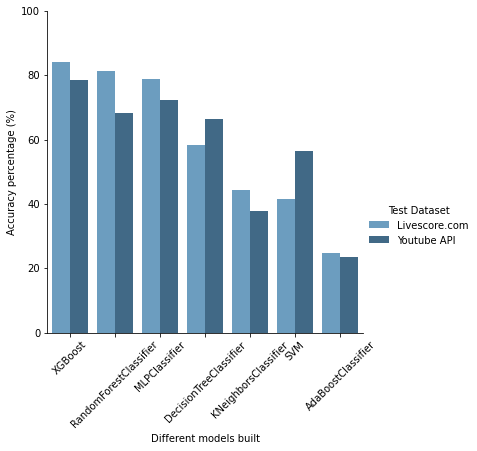

In [43]:
import pandas as pd
results_df = pd.DataFrame(results.items(), columns=["model", "accuracy"])
results_df["Test Dataset"] = "Livescore.com"
youtube_df = pd.DataFrame([ ["XGBoost", 78.73], 
                            ["RandomForestClassifier", 68.41],
                            ["MLPClassifier", 72.24],
                            ["DecisionTreeClassifier",66.32],
                            ["KNeighborsClassifier", 37.87],
                            ["SVM", 56.38],
                            ["AdaBoostClassifier", 23.4]],
                            columns=["model", "accuracy"])
youtube_df["Test Dataset"] = "Youtube API" 
results_df = results_df.append(youtube_df)
ax = sns.catplot(x="model", y="accuracy", hue="Test Dataset", kind="bar", data=results_df, palette="Blues_d")
plt.ylim(0,100)
for axes in ax.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
ax.set(xlabel='Different models built', ylabel='Accuracy percentage (%)')

In [1]:
import pandas as pd
df = pd.read_csv("eventswithleague.csv")

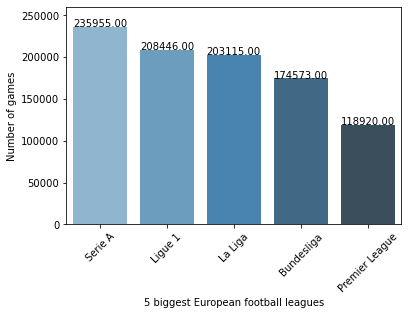

In [24]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 1
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


results = dict(df['league'].value_counts())


ax = sns.barplot(list(results.keys()), list(results.values()), palette="Blues_d")
plt.ylim(0,260000)
ax.tick_params(axis='x', labelsize=10)
for item in ax.get_xticklabels():
    item.set_rotation(45)
ax.set(xlabel='5 biggest European football leagues', ylabel='Number of games')
show_values_on_bars(ax)

In [48]:
df.groupby('id_odsp').first()["league"].value_counts()

Serie A           2152
Ligue 1           2076
La Liga           1939
Bundesliga        1608
Premier League    1299
Name: league, dtype: int64

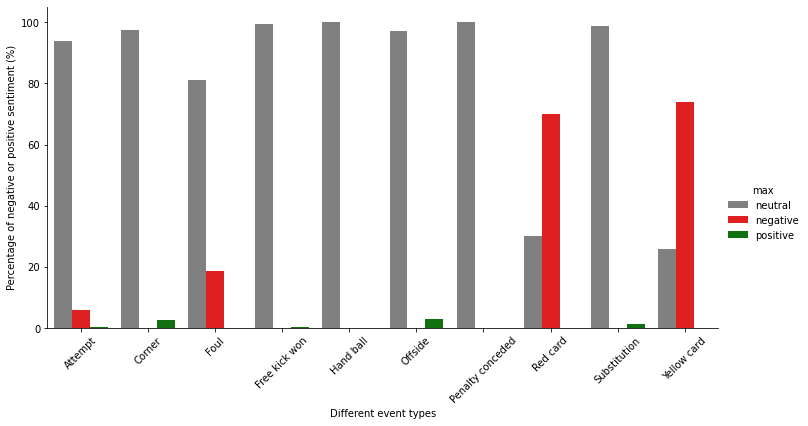

In [15]:
import pandas as pd
df = pd.read_csv("events_sentiment.csv", index_col=0)
#df = df[df["max"]!="neutral"]
df["event_cat"] = df["event_type"].replace({  1:"Attempt", 
                                        2:"Corner",
                                        3:"Foul", 
                                        4:"Yellow card", 
                                        5:"Second yellow card", 
                                        6:"Red card",
                                        7:"Substitution", 
                                        8:"Free kick won", 
                                        9:"Offside", 
                                        10:"Hand ball", 
                                        11:"Penalty conceded"})
x,y = 'event_cat', 'max'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()


ax = sns.catplot(x="event_cat", y="percent", hue="max", kind="bar", data=df1, palette=sns.color_palette(["gray", 'red', 'green']), aspect=2)
for axes in ax.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
ax.set(xlabel='Different event types', ylabel='Percentage of negative or positive sentiment (%)')

In [16]:
df1

,event_cat,max,percent
0,Attempt,neutral,93.742072
1,Attempt,negative,6.004228
2,Attempt,positive,0.253700
3,Corner,neutral,97.408207
4,Corner,positive,2.591793
5,Foul,neutral,81.220657
6,Foul,negative,18.779343
7,Free kick won,neutral,99.506641
8,Free kick won,positive,0.493359
9,Hand ball,neutral,100.000000
